# Applications of Empirical Modeling

In our last notebook, we learned how to:

1. do an automatic curve fit of *any mathematical function* to data and find the best-fit curve parameters.
2. use the model to answer questions and make predictions.
3. be wary of making predictions since the model may not fit data outside the range used for the model. (For example, a model based on "past" data may not fit "future" data.)

In this notebook, we will:

1. practice this technique to various data sets.
2. apply a curve fit to a range of data.
3. modify a model.

In [1]:
import numpy as np #used for arrays and numerical functions
import pandas as pd #used for reading a data file
import matplotlib.pyplot as plt #used for graphing
from scipy.optimize import curve_fit #used for curve fitting
from io import StringIO #used to convert string to a dataframe

# Part 1: Practice

## Exercise 1 - Vostok Ice Core

This exercise comes from [The Physics Hypertextbook](https://physics.info/linear-regression/practice.shtml). Data is from the [Vostok - Isotope and Gas Data and Temperature Reconstruction](https://www.ncdc.noaa.gov/paleo-search/study/2453) by Petit, et. al. (1999).

    Petit, J.R., J. Jouzel, D. Raynaud, N.I. Barkov, J.M. Barnola, I. Basile, M. Bender, J. Chappellaz, J. Davis, G. Delaygue, M. Delmotte, V.M. Kotlyakov, M. Legrand, V. Lipenkov, C. Lorius, L. Pépin, C. Ritz, E. Saltzman, and M. Stievenard. 1999. Climate and atmospheric history of the past 420,000 years from the Vostok Ice Core, Antarctica. Nature 399:429-436.
    
From a deep ice core sampled in Antarctica, surface temperature, carbon dioxide, and dust could be measured as a function of time in the past. While other measurements were made as well (see the above reference), we will look at temperature and carbon dioxide. This [data set](https://raw.githubusercontent.com/anthoak13/HNR-1303-F23/main/unit-03/03-04-applications/vostok.txt) includes the columns:

1. Age of air in years before present.
2. Temperature anomaly (difference in temperature from the present) in degrees celsius.
3. Carbon dioxide concentration in parts per million.


In [2]:
# read the data file
df = pd.read_csv('https://raw.githubusercontent.com/atitus/math-modeling-2/main/unit-03/03-05-applications/vostok.txt', sep='\t')
df.head()

,Age of air (ybp),Temperature anomaly (deg. C),Carbon dioxide concentration (ppm)
0,2342,-1.21,284.700000
1,2374,-1.44,284.303333
2,2418,-0.73,283.906667
3,2460,-0.63,283.510000
4,2501,0.30,283.113333


Here is a graph of temperature anomaly vs. carbon dioxide concentration.

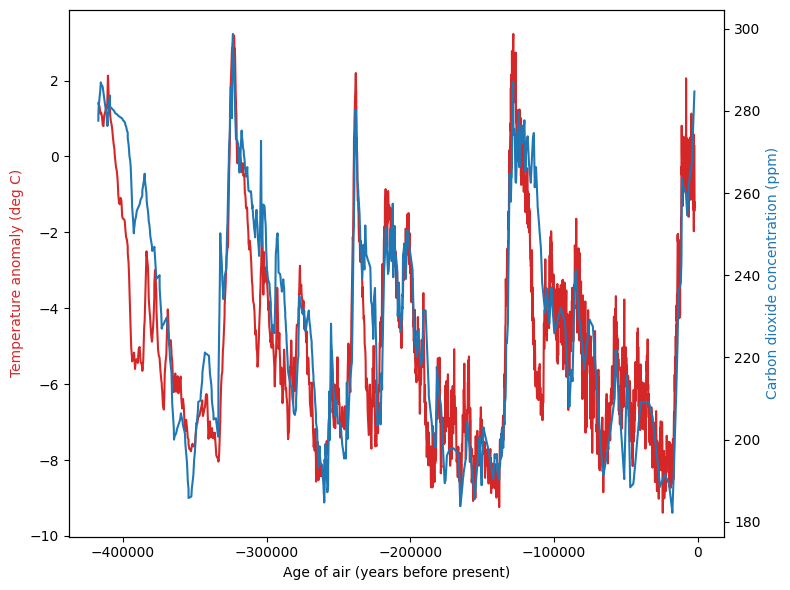

In [3]:
# define arrays for the data
xdata = -df['Age of air (ybp)'] #multiply by -1
ydata1 = df['Temperature anomaly (deg. C)']
ydata2 = df['Carbon dioxide concentration (ppm)']

fig, ax1 = plt.subplots(figsize=(8,6))

fig.title=('Temperature anomaly and carbon dioxide concentration as a function of time')
color = 'tab:red'
ax1.set_xlabel('Age of air (years before present)')

ax1.set_ylabel("Temperature anomaly (deg C)", color=color)
ax1.plot(xdata, ydata1, color=color)
#ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # create a second axis that shares attributes of the first axis

color = 'tab:blue'
ax2.set_ylabel('Carbon dioxide concentration (ppm)', color=color)
ax2.plot(xdata, ydata2, color=color)
#ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

It seems that temperature anomaly and carbon dioxide concentration might be related. Plot temperature anomaly vs. carbon dioxide concentration.

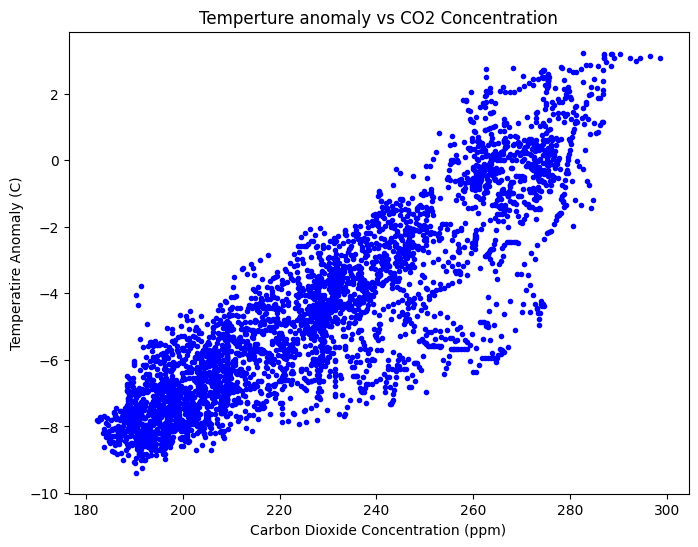

In [6]:
ydata = df['Temperature anomaly (deg. C)']
xdata = df['Carbon dioxide concentration (ppm)']

# plot data and the best-fit function on the same graph
fig = plt.figure(figsize=(8,6))
plt.title("Temperture anomaly vs CO2 Concentration")
plt.xlabel('Carbon Dioxide Concentration (ppm)')
plt.ylabel('Temperatire Anomaly (C)')
plt.plot(xdata, ydata, 'b.') #plot data
plt.show()


The data seems linear, so let's do a linear fit of the form $y=ax + b$. To verify your fit, you should find best-fit parameters to be:

$a=0.0908$

$b=-25.2349$

In [10]:
model = lambda x,a,b: a*x+b

params, covar = curve_fit(model, xdata, ydata)

print("Slope is: ", params[0])
print("Intercept is: ", params[1])

print("In 1981 the temperature anomaly would be {:.2f} deg C".format(model(340, *params)))
print("In 2018 the temperature anomaly would be {:.2f} deg C".format(model(408, *params)))

Slope is:  0.09079330209135601
Intercept is:  -25.234881381549993
In 1981 the temperature anomaly would be 5.63 deg C
In 2018 the temperature anomaly would be 11.81 deg C


Here's [more recent data for carbon dioxide concentration](https://www.eea.europa.eu/data-and-maps/daviz/atmospheric-concentration-of-carbon-dioxide-5). You will need to change the "pollutant" to carbon dioxide (CO<sub>2</sub>).

Also, here's [more recent data for temperature anomaly](https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.txt). Note the column for annual mean (Jan. - Dec.) and that the unit is 0.01 degrees celsius. Thus, divide by 100 to get degrees celsius.

Use your model and/or the data to answer the following questions:

1. What is the unit of the constant $a$?

The units of a are $\frac{C^\circ}{ppm}$

2. What is the unit of the constant $b$?

The units of b are $C^\circ$

3. How many years ago was the most recent measurement of temperature anomaly and carbon dioxide concentration from the Vostok ice core?

The most recent measurement was from 2342 years before present when the data was published in 1999. So it was from 2366 years ago.

4. In 1981, the carbon dioxide concentration was 340 ppm. What does your model predict would be the temperature anomaly in 1981 and what is the measured temperature anomaly in 1981?

Our model predicts the temperature anomaly would be 5.63 deg C. The measured anomaly was 0.31 deg C.

5. In 2018, the carbon dioxide concentration was 408 ppm. What does your model predict would be the temperature anomaly in 2018 and what is the measured temperature anomaly in 2018?

Our model predicts the temperature anomaly would be 11.81 deg C. The measured anomaly was 0.85 deg C.

6. Give a reason why the model may not be able to closely predice recent temperature anomalies?

The data in the model is entirely composed of measurements where the concentration of CO2 is less than more recent data. The highest concentration of CO2 in the model is about 300 ppm, much less than the recent values.

7. Just because the model may not predict recent temperature anomalies, should we completely ignore the relationship between carbon dioxide concentration and global temperature anomaly and not worry at all about the increase in global carbon emissions?

No, because other models, including those informed by more recent data, show a similar link.

## Exercise 2 - Transmission of Light by Glass: What should you do if  `curve_fit` fails?

Glass transmits visible light very well. But it blocks most infrared and ultraviolet light. Data for the transmission of light vs wavelength for a particular glass is in the file [transmission-glass.txt](https://raw.githubusercontent.com/anthoak13/HNR-1303-F23/main/unit-03/03-04-applications/transmission-glass.txt). ([source](http://nvlpubs.nist.gov/nistpubs/jres/38/jresv38n6p601_A1b.pdf))

Try to fit a Gaussian model to the data using:

$$y=ae^{\left(-\frac{1}{2}\left(\frac{x-b}{c}\right)^2\right)}$$

and try to find the best-fit parameters `a`, `b`, and `c`. You will notice that `curve_fit()` fails. 

   Wavelength (nm)  Relative Response (arb)
0              300                        0
1              320                        1
2              340                        3
3              360                        5
4              380                       10
[1. 1. 1.]
The parameter a is  1.0
The parameter b is   1.0
The parameter c is   1.0


/home/adam/FA23/HNR-1303-F23/.venv/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


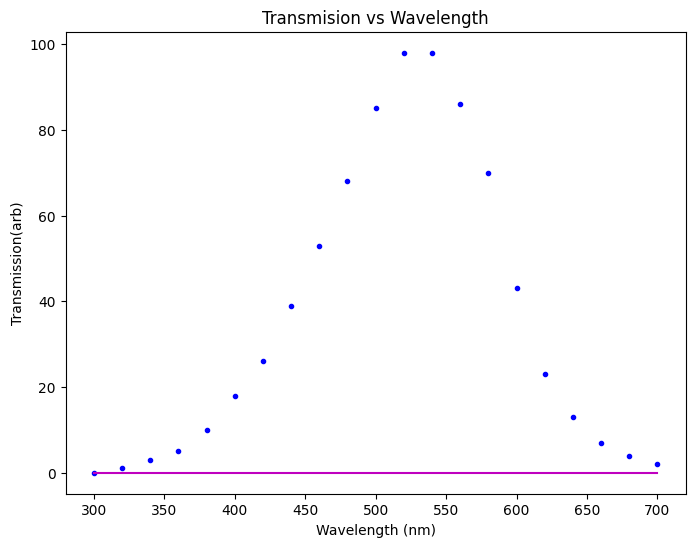

In [20]:
# read the data file
df = pd.read_csv('https://raw.githubusercontent.com/anthoak13/HNR-1303-F23/main/unit-03/03-04-applications/transmission-glass.txt', sep='\t')
print(df.head())

# define arrays for the data
xdata = df['Wavelength (nm)']
ydata = df['Relative Response (arb)']

# define the model function; this function returns y(x) for a given x and fit parameters
model = lambda x,a,b,c: a*np.exp(-0.5*((x-b)/c)**2)

# Find best fit parameters
guess=[1,1,1] # this is the initial guess for the fit parameters
params, covariance = curve_fit(model, xdata, ydata, p0=guess)

print(params)
print("The parameter a is ", params[0])
print("The parameter b is  ", params[1])
print("The parameter c is  ", params[2])

xmodel = np.linspace(300,700,100)
ymodel = model(xmodel, *params)

fig = plt.figure(figsize=(8,6))
plt.title("Transmision vs Wavelength")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmission(arb)')
plt.plot(xdata, ydata, 'b.') #plot data
plt.plot(xmodel, ymodel, 'm-') #plot data
plt.show()


The `curve_fit()` function adjusts the fit parameters until it minimizes the sum of the squares of the residuals. It starts with the initial guesses for the parameters listed in the line:

```python
guess=[1,1,1]
```

Note that there is a value for each parameter. So in this case, the initial guesses are $a=1$, $b=1$, and $c=1$. But the `curve_fit()` function fails if the initial guesses are far from the best-fit values. When this happens, change the initial guesses. You will have to make them much larger or smaller, and understanding how the parameters affects the function is important for determining a reasonable guess.

In this example, the parameter `a` is the peak of the gaussian which is close to 100. The parameter `b` is the mean which is around 530. And `c` is related to the width of the peak (or variance) which is around 100. Try using these initial values.

Adjust your `guess` for the fit parameters, and find the best-fit parameters `a`, `b`, and `c`.

   Wavelength (nm)  Relative Response (arb)
0              300                        0
1              320                        1
2              340                        3
3              360                        5
4              380                       10
[ 97.31819247 525.31467394  60.97495071]
The parameter a is  97.31819247432698
The parameter b is   525.3146739448156
The parameter c is   60.97495071346531


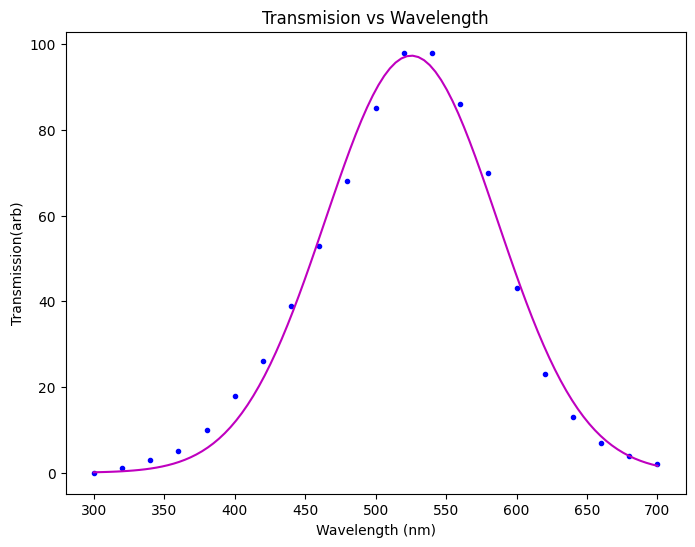

In [23]:
# read the data file
df = pd.read_csv('https://raw.githubusercontent.com/anthoak13/HNR-1303-F23/main/unit-03/03-04-applications/transmission-glass.txt', sep='\t')
print(df.head())

# define arrays for the data
xdata = df['Wavelength (nm)']
ydata = df['Relative Response (arb)']

# define the model function; this function returns y(x) for a given x and fit parameters
model = lambda x,a,b,c: a*np.exp(-0.5*((x-b)/c)**2)

# Find best fit parameters
guess=[100,530,100] # this is the initial guess for the fit parameters
params, covariance = curve_fit(model, xdata, ydata, p0=guess)

print(params)
print("The parameter a is ", params[0])
print("The parameter b is  ", params[1])
print("The parameter c is  ", params[2])

xmodel = np.linspace(300,700,100)
ymodel = model(xmodel, *params)

fig = plt.figure(figsize=(8,6))
plt.title("Transmision vs Wavelength")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmission(arb)')
plt.plot(xdata, ydata, 'b.') #plot data
plt.plot(xmodel, ymodel, 'm-') #plot data
plt.show()


## Exercise 3 - Kepler's Second Law

Kepler found a relationship between the period of a planet's orbit (in Earth years) and the semi-major axis (kinda like the radius, for a circular orbit) of the planet's orbit (in astronomical units, AU; 1 AU is the semi-major axis of Earth's orbit). Data for the 8 planets is in the file [planets.txt](https://raw.githubusercontent.com/anthoak13/HNR-1303-F23/main/unit-03/03-04-applications/planets.txt).

1. Plot the period vs. semimajor axis of the planet's orbit.
2. Fit a power law: 
  $$y = Ax^n$$
  and find the best-fit parameters.
3. There are [five dwarf planets](https://en.wikipedia.org/wiki/Dwarf_planet). 
  1. Use your model to **predict** the period of each of the dwarf planets' orbits using the semimajor axis of their orbits.
  2. Compare your prediction to the actual period of each dwarf planet. Make a table (in Markdown) of your prediction for the period and the actual period of the dwarf planets.

|Name | Predicted Persiod (years) | Measured Period (years) |
|---|---|---|
|Ceres|4.606|4.604
|Pluto|248.0|247.9
|Eris|558.9|559.1
|Haumea|284.1|284.1
|Makemake|307.5|307.5

   semi-major axis (AU)  period (Earth Years)
0                 0.387              0.240842
1                 0.723              0.615178
2                 1.000              1.000000
3                 1.524              1.880797
4                 5.203             11.860000
[1.0002932  1.49986773]
The parameter a is  1.0002931986142611
The parameter n is   1.4998677279588946
4.6059366283139624
248.0172431762437
558.8636045592569
284.07832875987697
307.4563766398376


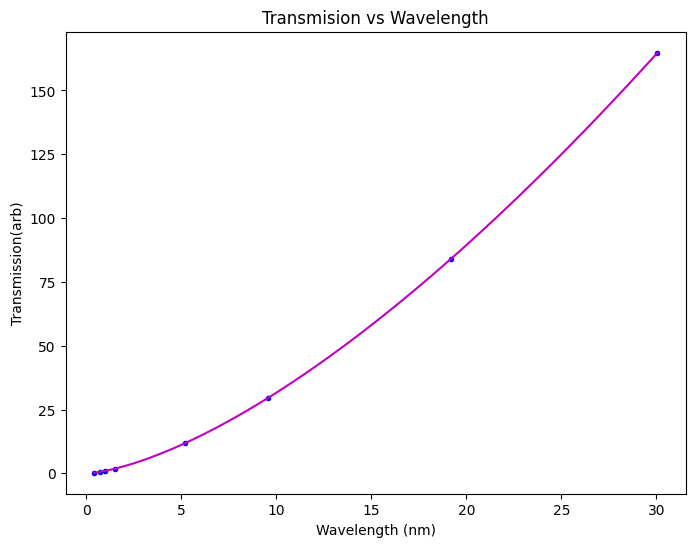

In [28]:
# read the data file
df = pd.read_csv('https://raw.githubusercontent.com/anthoak13/HNR-1303-F23/main/unit-03/03-04-applications/planets.txt', sep='\t')
print(df.head())

# define arrays for the data
xdata = df['semi-major axis (AU)']
ydata = df['period (Earth Years)']

# define the model function; this function returns y(x) for a given x and fit parameters
model = lambda x,a,n: a*x**n

# Find best fit parameters
guess=[1,1] # this is the initial guess for the fit parameters
params, covariance = curve_fit(model, xdata, ydata, p0=guess)

print(params)
print("The parameter a is ", params[0])
print("The parameter n is  ", params[1])

print(model(2.768,*params))
print(model(39.48,*params))
print(model(67.86,*params))
print(model(43.22,*params))
print(model(45.56,*params))

xmodel = np.linspace(min(xdata),max(xdata),100)
ymodel = model(xmodel, *params)

fig = plt.figure(figsize=(8,6))
plt.title("Transmision vs Wavelength")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmission(arb)')
plt.plot(xdata, ydata, 'b.') #plot data
plt.plot(xmodel, ymodel, 'm-') #plot data
plt.show()

## Exercise 4 - Allometry

In biological systems, emperical models are sometimes discovered that mathematically relate one biological (often anatomical) measurement with another. **Allometry** is the general study of emperical relationships in biological systems. Typically there are no theoretical models to predict such a relationship. Therefore, allometric relationships are **emperical models**.

This 2015 paper by Jean Gayon, [History of the Concept of Allometry](https://academic.oup.com/icb/article/40/5/748/157095), describes the history of the field of allometry and especially the work of pioneers Huxley and Teissier.

In this excellent summary of the field of allometry, [Allometry: The Study of Biological Scaling](https://www.nature.com/scitable/knowledge/library/allometry-the-study-of-biological-scaling-13228439/), the author states:

"Allometry, in its broadest sense, describes how the characteristics of living creatures change with size. The term originally referred to the scaling relationship between the size of a body part and the size of the body as a whole, as both grow during development. However, more recently the meaning of the term allometry has been modified and expanded to refer to biological scaling relationships in general, be it for morphological traits (e.g., the relationship between brain size and body size among adult humans), physiological traits (e.g., the relationship between metabolic rate and body size among mammal species) or ecological traits (e.g., the relationship between wing size and flight performance in birds). Indeed, allometric relationships can be described for almost any co-varying biological measurements, resulting in broad usage of the term. However, a unifying theme is that allometry describes how traits or processes scale with one another. The study of allometry concerns the functional mechanisms that generate these scaling relationship, how they impact ecology, and how they respond to and influence evolution."

### Fiddler Crab

A [fiddler crab](https://scaquarium.org/our-animals/sand-fiddler-crab/) has one very large claw and one small claw. (The image is from [the SC Aquarium](https://scaquarium.org/our-animals/sand-fiddler-crab/).)

![](https://scaquarium.org/wp-content/uploads/2015/11/sc-aquarium-fiddler-crab-animal-spec-sheet.jpg)

The file [fiddler-crab.txt](https://raw.githubusercontent.com/anthoak13/HNR-1303-F23/main/unit-03/03-04-applications/fiddler-crab.txt) has data for the length of its claw in mm and diameter of the crab in mm. ([data source](https://www.futurelearn.com/courses/maths-power-laws/0/steps/12170))

**Graph the length of its claw in mm vs. the diameter of the crab in mm.**

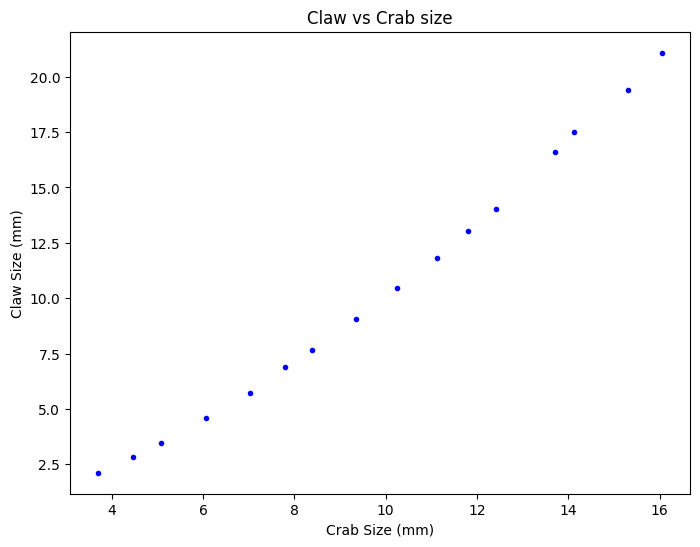

In [35]:
# read the data file
df = pd.read_csv('https://raw.githubusercontent.com/anthoak13/HNR-1303-F23/main/unit-03/03-04-applications/fiddler-crab.txt', sep='\t')
#print(df.head())

# define arrays for the data
xdata = df['Crab Size (mm)']
ydata = df['Claw Size (mm)']

fig = plt.figure(figsize=(8,6))
plt.title("Claw vs Crab size")
plt.xlabel('Crab Size (mm)')
plt.ylabel('Claw Size (mm)')
plt.plot(xdata, ydata, 'b.') #plot data
plt.show()

The relationship is not linear. **Which grows faster, the claw length or the crab's body?**

The claw grows faster.

**Find an emperical model that describes the length of the crab's claw as a function of the crab's diameter.** Note that the model must go through the point $(0,0)$ because when a crab is young, its diameter is nearly zero and its claw length is nearly zero. Then, as it grows, its diameter and its claw length increase.

Therefore, try a power function:

$$y = a x^n$$

The parameter a is  0.2740156696340342
The parameter n is   1.5646391246753548


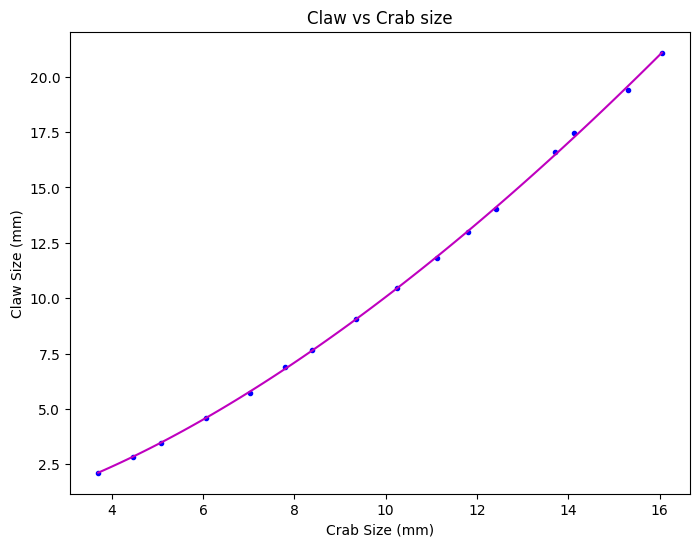

In [36]:
# read the data file
df = pd.read_csv('https://raw.githubusercontent.com/anthoak13/HNR-1303-F23/main/unit-03/03-04-applications/fiddler-crab.txt', sep='\t')
#print(df.head())

# define arrays for the data
xdata = df['Crab Size (mm)']
ydata = df['Claw Size (mm)']

# define the model function; this function returns y(x) for a given x and fit parameters
model = lambda x,a,n: a*x**n

# Find best fit parameters
guess=[1,1] # this is the initial guess for the fit parameters
params, covariance = curve_fit(model, xdata, ydata, p0=guess)


print("The parameter a is ", params[0])
print("The parameter n is  ", params[1])


xmodel = np.linspace(min(xdata),max(xdata),100)
ymodel = model(xmodel, *params)

fig = plt.figure(figsize=(8,6))
plt.title("Claw vs Crab size")
plt.xlabel('Crab Size (mm)')
plt.ylabel('Claw Size (mm)')
plt.plot(xdata, ydata, 'b.') #plot data
plt.plot(xmodel, ymodel, 'm-') #plot data
plt.show()

Suppose you are walking on the beach and find a claw that was tragically separated from the crab. (Don't worry, they can [evidently grow another one on the other side after their next molt](https://en.wikipedia.org/wiki/Fiddler_crab).) The length of the claw is 4 mm. **What was the width of the crab that lost the claw?**

The width of the crab is about 5.55 mm.

In [41]:
print(model(5.55,*params))

4.002444517271808
